In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [15]:
df = pd.read_csv("ex2data1.txt",header=None, names=["Exam 1", "Exam 2", "Admitted"])
df.head(10)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [26]:
print("Shape:",df.shape)
print("(0 = not admitted, 1 = admitted):")
df["Admitted"].value_counts()

Shape: (100, 3)
(0 = not admitted, 1 = admitted):


Admitted
1    60
0    40
Name: count, dtype: int64

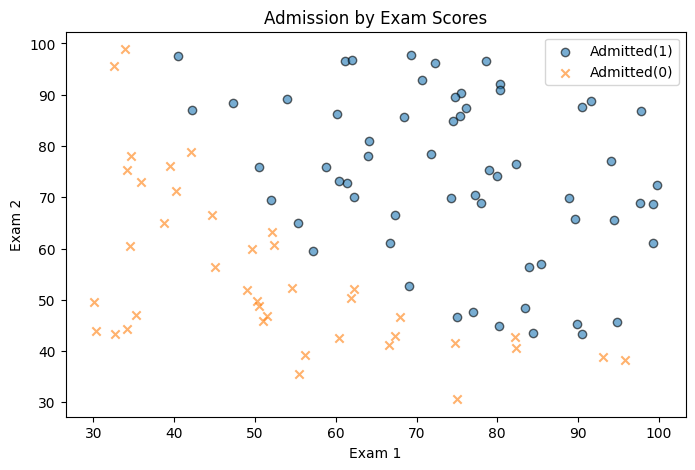

In [32]:
plt.figure(figsize = (8,5))
admit_1 = df[df["Admitted"]== 1]
admit_0 = df[df["Admitted"]== 0]

plt.scatter(admit_1["Exam 1"],admit_1["Exam 2"], label = "Admitted(1)", marker ="o", edgecolor ="k", alpha = 0.6)
plt.scatter(admit_0["Exam 1"],admit_0["Exam 2"], label = "Admitted(0)", marker ="x" , alpha = 0.6)          

plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.title ("Admission by Exam Scores")
plt.legend()
plt.tight_layout
plt.show()

### Model training

In [54]:
X = df[["Exam 1","Exam 2"]]
y = df["Admitted"]

''' Divide into train/test '''
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=42, stratify=y)
''' Standardize features'''
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

''' Fit logistic regression'''
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train_sc, y_train) 



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Model evaluation

In [55]:
'''Prediction and accuracy'''
y_pred = model.predict(X_test_sc)         # predicted classes (0/1
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy:: {acc:.3f}")

Accuracy:: 0.933


In [57]:
intercept = float(model.intercept_[0])   
coef_vec  = model.coef_[0]               
print(f"Intercept (bias): {intercept:.6f}")
print("Coefficients:")
print(pd.Series(coef_vec, index=['Exam 1','Exam 2']))

Intercept (bias): 0.839940
Coefficients:
Exam 1    2.090598
Exam 2    1.779021
dtype: float64


Conclusion:
The model predicts if person is admitted or not with 93.3 % accuracy.
Exam 1 strongly increases the chance of being admitted (Exam 2 as well but slightly less).
The baseline bias is positive(0.84) -> model already leans a bit towards Admitted even if exam scores are low.